In [9]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
np.unique(y)
type(y)

numpy.ndarray

## cross validation using train_test_split in sklearn.model_selection


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Feature scaling 
Feature scaling gives optimal performance by standardizing/normalizing different features.
StandardScaler is a class in preprocessing module of sklearn package to perform feature scaling.

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# perform the standardization on X_train dataset using the fit method. This calculates the sample mean and stdev of
# each feature. 

sc.fit(X_train)

# transform uses the sample mean and stdev calculated by fit to standardize each feature using (xi-u)/stdev.
# same parameters are used to transform the test data so it can be compared with the training dataset.

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)




## Applying Perceptron model

In [22]:
from sklearn.linear_model import Perceptron

# creating an object of Perceptron class with specific parameters. random_state is set to 0 to achieve reproducibility
# if more than one epochs are performed on the training dataset.

ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Predicting the outcomes on test data
After applying the model on the training dataset, we will make predictions about the test data. We will also calculate missclassified outcomes. 

In [28]:
y_pred = ppn.predict(X_test_std)
print("Missclassified samples: %d" % (y_test != y_pred).sum())

Missclassified samples: 5


The accuracy of the model can be calculate as follows:
1-(5/45) * 100 = 88.9%
Another method is metric module which is used below:

## metric module
metric module in sklearn offers a large variety of performance metrics for calculting the accuracy of a model.

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.89


## Plotting decision boundaries

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
test_idx=None, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


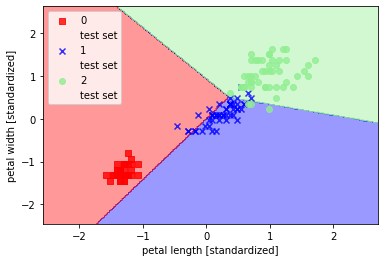

In [36]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()